IF ROUTE

In [ ]:
import pandas as pd
df_if=pd.read_csv("/content/TMT_12MM_IF_Route.csv")
df_if

,Date,Price
0,5/30/2020,36300
1,6/1/2020,36600
2,6/2/2020,37100
3,6/3/2020,37100
4,6/4/2020,36700
...,...,...
1491,4/26/2025,48100
1492,4/28/2025,47800
1493,4/29/2025,47800
1494,4/30/2025,47300


In [ ]:
Coal=pd.read_csv("/content/Coal_Non_Coking_Portside_Ex-Gangavaram_India_RB2_5500_NAR_S_Africa.csv")
Ingot=pd.read_csv("/content/Ingot_DAP-Mandi_Gobindgarh_India_3_5_x_4_5_Inch_IS_2830.csv")
Iron_Ore_Chattisgarh=pd.read_csv("/content/Iron_Ore_Fines_NMDC_Chattisgarh_India_0_-10_mm_Fe_64.csv")
Iron_Ore_Bolani=pd.read_csv("/content/Iron_Ore_Fines_SAIL_Bolani_Odisha_0-5_mm_Fe_62_5.csv")
Scrap_Mandi=pd.read_csv("/content/Melting_Scrap_DAP-Mandi_Gobindgarh_India_End_Cutting.csv")
Scrap_Durgapur=pd.read_csv("/content/Melting_Scrap_DAP-Durgapur_India_Thickness_2_ndash_6_mm_-_Size_up_to_1_5_feet_End_Cutting.csv")
Sponge_Iron_DRCLO=pd.read_csv("/content/Sponge_Iron_DRCLO_Exw-Raipur_India_Mix_FeM_82_--1.csv")
Sponge_Iron_PDRI=pd.read_csv("/content/Sponge_Iron_PDRI_Exw-Raipur_India_Lumps_FeM_80_--1.csv")
Thermal_coal=pd.read_csv("/content/Thermal_coal.csv")

In [ ]:
import pandas as pd

# Step 1: All file names in a list (adjust the paths accordingly)
file_paths = [
    "/content/TMT_12MM_IF_Route.csv",
    "/content/Coal_Non_Coking_Portside_Ex-Gangavaram_India_RB2_5500_NAR_S_Africa.csv",
    "/content/Ingot_DAP-Mandi_Gobindgarh_India_3_5_x_4_5_Inch_IS_2830.csv",
    "/content/Iron_Ore_Fines_NMDC_Chattisgarh_India_0_-10_mm_Fe_64.csv",
    "/content/Iron_Ore_Fines_SAIL_Bolani_Odisha_0-5_mm_Fe_62_5.csv",
    "/content/Melting_Scrap_DAP-Mandi_Gobindgarh_India_End_Cutting.csv",
    "/content/Melting_Scrap_DAP-Durgapur_India_Thickness_2_ndash_6_mm_-_Size_up_to_1_5_feet_End_Cutting.csv",
    "/content/Sponge_Iron_DRCLO_Exw-Raipur_India_Mix_FeM_82_--1.csv",
    "/content/Sponge_Iron_PDRI_Exw-Raipur_India_Lumps_FeM_80_--1.csv",
    "/content/Thermal_coal.csv"
]


custom_price_names = [
    "IF_Price", "Coal_Price", "Ingot_Price", "Sponge_Iron_DRCLO_Price", "Scrap_Mandi_price",
    "Sponge_Iron_PDRI_Price", "Scrap_Durgapur_price", "Iron_Ore_Bolani_Price", "Iron_Ore_Chattisgarh_Price", "Thermal_Coal_Price"
]

# Step 2: Load and rename
dfs = []
for file, new_price_col in zip(file_paths, custom_price_names):
    df = pd.read_csv(file, parse_dates=['Date'])
    df = df.sort_values('Date')
    df.rename(columns={'Price': new_price_col}, inplace=True)
    dfs.append(df)

# Step 3: Merge all on 'Date'
merged_df = dfs[0]
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, on='Date', how='outer')

# Step 4: Sort by date and reset index
merged_df = merged_df.sort_values('Date').reset_index(drop=True)

# Step 5 (Optional): Export to CSV
merged_df.to_csv("merged_custom_if_prices.csv", index=False)

# Preview result
print(merged_df.head())


        Date  Price   \
0 2020-05-07     NaN   
1 2020-05-08     NaN   
2 2020-05-09     NaN   
3 2020-05-11     NaN   
4 2020-05-12     NaN   

   Price : Non Coking, Portside, Ex-Gangavaram, India : RB2 (5500 NAR), S.Africa  \
0                                                NaN                               
1                                                NaN                               
2                                                NaN                               
3                                                NaN                               
4                                                NaN                               

   Price : Ingot, DAP-Mandi Gobindgarh, India : 3.5 x 4.5 Inch,IS 2830  \
0                                                NaN                     
1                                                NaN                     
2                                                NaN                     
3                                                NaN  

In [ ]:
import pandas as pd

# Step 1: Load and sort the dataset
df_if_merged=pd.read_csv("/content/merged_custom_if_prices.csv")
df_if_merged['Date'] = pd.to_datetime(df_if_merged['Date'])
df_if_merged = df_if_merged.sort_values('Date')

# Step 2: Define columns to fill (exclude 'Date' and 'IF_Price')
cols_to_fill = [col for col in df_if_merged.columns if col not in ['Date', 'IF_Price ']]

# Step 3: Rolling average + ffill + bfill for each variable
for col in cols_to_fill:
    # Rolling mean (centered 30-day window)
    df_if_merged[col] = df_if_merged[col].fillna(df_if_merged[col].rolling(window=30, min_periods=1, center=True).mean())

    # Remaining NaNs filled with forward fill and then backward fill
    df_if_merged[col] = df_if_merged[col].fillna(method='ffill').fillna(method='bfill')

# Optional: Uncomment below for month-based seasonal mean imputation instead
df_if_merged['Month'] = df_if_merged['Date'].dt.month
for col in cols_to_fill:
    df_if_merged[col] = df_if_merged.groupby('Month')[col].transform(lambda x: x.fillna(x.mean()))


# Step 4: Confirm NaNs are handled
print("\nRemaining NaNs after imputation:")
print(df_if_merged[cols_to_fill].isna().sum())

# Step 5: (Optional) Save clean version
df_if_merged.to_csv("merged_cleaned_if_dataset.csv", index=False)
print("\n Cleaned dataset saved as 'merged_cleaned_if_dataset.csv'")



Remaining NaNs after imputation:
Price                                                                                                      0
Price : Non Coking, Portside, Ex-Gangavaram, India : RB2 (5500 NAR), S.Africa                              0
Price : Ingot, DAP-Mandi Gobindgarh, India : 3.5 x 4.5 Inch,IS 2830                                        0
Price : Iron Ore Fines, NMDC, Chattisgarh, India : 0 -10 mm,Fe 64%                                         0
Price : Iron Ore Fines, SAIL Bolani, Odisha : 0-5 mm,Fe 62.5%                                              0
Price : Melting Scrap, DAP-Mandi Gobindgarh, India : End Cutting                                           0
Price : Melting Scrap, DAP-Durgapur, India : Thickness: 2&ndash;6 mm / Size: up to 1.5 feet,End Cutting    0
Price : Sponge Iron, DRCLO, Exw-Raipur, India : Mix,FeM 82%, +/-1                                          0
Price : Sponge Iron, PDRI, Exw-Raipur, India : Lumps,FeM 80%, +/-1                            

/tmp/ipython-input-4-755795560.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_if_merged[col] = df_if_merged[col].fillna(method='ffill').fillna(method='bfill')


In [ ]:
import pandas as pd

# Step 1: Load dataset and sort by date
df_if_cleaned_merged = pd.read_csv("/content/merged_cleaned_if_dataset.csv")
df_if_cleaned_merged['Date'] = pd.to_datetime(df_if_cleaned_merged['Date'])
df_if_cleaned_merged = df_if_cleaned_merged.sort_values('Date')



# Step 4: Drop rows where IF_Price is NaN
before_drop = len(df_if_cleaned_merged)
df_if_cleaned_merged = df_if_cleaned_merged.dropna(subset=['IF_Price'])
after_drop = len(df_if_cleaned_merged)

print(f"\n Dropped {before_drop - after_drop} rows where IF_Price was NaN")

# Step 5: Drop 'Month' helper column
df_if_cleaned_merged = df_if_cleaned_merged.drop(columns=['Month'])

# Step 6: Final NaN check
print("\n Remaining NaNs in dataset (should be all 0):")
print(df_if_cleaned_merged.isna().sum())

# Step 7: Save cleaned dataset
df_if_cleaned_merged.to_csv("cleaned_merged_dataset_if.csv", index=False)
print("\n Cleaned dataset saved as 'cleaned_merged_dataset_if.csv'")


 Dropped 29 rows where IF_Price was NaN

 Remaining NaNs in dataset (should be all 0):
Date                          0
IF_Price                      0
Coal_Price                    0
Ingot_Price                   0
Iron_Ore_Chattisgarh_Price    0
Iron_Ore_Bolani_Price         0
Scrap_Mandi_Price             0
Scrap_Durgapur_Price          0
Sponge_Iron_DRCLO_Price       0
Sponge_Iron_PDRI_Price        0
Thermal_Coal_Price            0
dtype: int64

 Cleaned dataset saved as 'cleaned_merged_dataset_if.csv'


In [ ]:
import pandas as pd


df_if_merged = pd.read_csv("/content/cleaned_merged_dataset_if.csv")
correlation_with_target = df_if_merged.corr(numeric_only=True)['IF_Price'].sort_values(ascending=False)

# Print all correlations
print("Correlation of all variables with TMT IF Price:\n")
print(correlation_with_target)

# Optional: Filter high correlation (threshold > 0.9)
print("\nHighly Correlated Variables (correlation > 0.9):\n")
print(correlation_with_target[correlation_with_target > 0.9])

Correlation of all variables with TMT IF Price:

IF_Price                      1.000000
Scrap_Mandi_Price             0.965634
Sponge_Iron_DRCLO_Price       0.950857
Sponge_Iron_PDRI_Price        0.932642
Ingot_Price                   0.870075
Coal_Price                    0.840548
Thermal_Coal_Price            0.840548
Iron_Ore_Bolani_Price         0.024958
Scrap_Durgapur_Price          0.006539
Iron_Ore_Chattisgarh_Price   -0.250309
Name: IF_Price, dtype: float64

Highly Correlated Variables (correlation > 0.9):

IF_Price                   1.000000
Scrap_Mandi_Price          0.965634
Sponge_Iron_DRCLO_Price    0.950857
Sponge_Iron_PDRI_Price     0.932642
Name: IF_Price, dtype: float64


Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0942 - val_loss: 0.0025
Epoch 2/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0068 - val_loss: 6.3388e-04
Epoch 3/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0026 - val_loss: 9.7654e-04
Epoch 4/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0017 - val_loss: 6.2545e-04
Epoch 5/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0015 - val_loss: 6.0710e-04
Epoch 6/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0015 - val_loss: 6.1217e-04
Epoch 7/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0014 - val_loss: 6.2745e-04
Epoch 8/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0013 - val_loss: 6.3872e-04
Epoch 9/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0013 - val_loss: 6.4400e-04
Epoch 10/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0012 - val_loss: 6.4283e-04
Epoch 11/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0012 - val_loss: 6.3583e-04
Epoch 12/300
29/29 ━━━━━

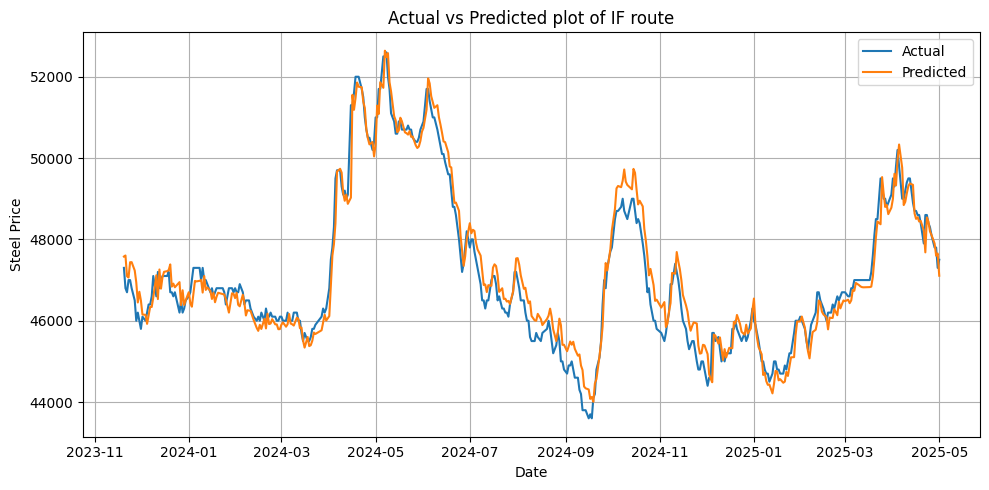

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import os
import random
import tensorflow as tf


SEED=42
os.environ['PYTHONHASHHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)



# ----------------------
# 1. Load and preprocess
# ----------------------
df_merged = pd.read_csv("/content/merged_cleaned_if_dataset_HIGH_CORRELATED_VARIABLES.csv")
df_merged['Date'] = pd.to_datetime(df_merged['Date'])
df_merged = df_merged.sort_values('Date')
df_merged.rename(columns={'IF_Price': 'Price'}, inplace=True)
df_merged['is_monsoon'] = df_merged['Date'].dt.month.between(6, 9).astype(int)

# Add monthly seasonality using sin/cos
df_merged['Month'] = df_merged['Date'].dt.month
df_merged['Month_sin'] = np.sin(2 * np.pi * df_merged['Month'] / 12)
df_merged['Month_cos'] = np.cos(2 * np.pi * df_merged['Month'] / 12)

# Normalize price
scaler = MinMaxScaler()
df_merged['Price_scaled'] = scaler.fit_transform(df_merged[['Price']])


# ----------------------
# 2. Create sequences for LSTM
# ----------------------
def create_sequences(data, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        seq = data.iloc[i:i + seq_length]
        target = data.iloc[i + seq_length]['Price_scaled']

        features = seq[['Price_scaled', 'Month_sin', 'Month_cos']].values
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(df_merged, seq_length)

# Splitting
total_samples=len(X)
train_size=int(0.7*total_samples)
X_train=X[:train_size]
y_train=y[:train_size]
X_test=X[train_size:]
y_test=y[train_size:]



# ----------------------
# 3. Build and train LSTM
# ----------------------
model = Sequential()
model.add(LSTM(64, input_shape=(seq_length, X_train.shape[2]), return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.1, verbose=1)

# ----------------------
# 4. Predict
# ----------------------
y_pred_val = model.predict(X_test)
y_pred_val_rescaled = scaler.inverse_transform(y_pred_val.reshape(-1,1))
y_val_rescaled = scaler.inverse_transform(y_test.reshape(-1,1))
# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_val_rescaled, y_pred_val_rescaled))
mae = mean_absolute_error(y_val_rescaled, y_pred_val_rescaled)
r2 = r2_score(y_val_rescaled, y_pred_val_rescaled)

print(f"Test Performance :")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R^2 Score: {r2:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(df_merged['Date'].iloc[-len(y_val_rescaled):], y_val_rescaled, label='Actual')
plt.plot(df_merged['Date'].iloc[-len(y_pred_val_rescaled):], y_pred_val_rescaled, label='Predicted')
plt.title("Actual vs Predicted plot of IF route")
plt.xlabel("Date")
plt.ylabel("Steel Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# STEP 1: Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from datetime import timedelta
import os
import random
import tensorflow as tf

# Reproducibility
SEED = 42
os.environ['PYTHONHASHHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# STEP 2: Load & Preprocess Dataset
# Assuming the high correlated variables file is correctly generated and named
df = pd.read_csv("/content/merged_cleaned_if_dataset_HIGH_CORRELATED_VARIABLES.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

# Select only the relevant columns for the LSTM model
df = df[['IF_Price', 'Scrap_Mandi_Price', 'Sponge_Iron_DRCLO_Price', 'Sponge_Iron_PDRI_Price']]


# STEP 3: Normalize Data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns, index=df.index)

# STEP 4: Create LSTM Sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 30  # Use past 30 days to predict next day
X, y = create_sequences(scaled_data, window_size)

# STEP 5: LSTM Model Architecture
model = Sequential()
# Input shape is (window_size, number of features)
model.add(LSTM(64, activation='relu', return_sequences=False, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(y.shape[1]))  # Output layer size matches the number of target variables
model.compile(optimizer='adam', loss='mse')

# STEP 6: Train Model
model.fit(X, y, epochs=50, batch_size=16, verbose=1)

# STEP 7: Predict Next 60 Days Step-by-Step
forecast = []
last_input = scaled_data[-window_size:].copy()

for _ in range(60):
    input_seq = last_input.reshape((1, window_size, scaled_data.shape[1]))
    pred = model.predict(input_seq, verbose=0)[0]  # Predict next [IF, Scrap, DRCLO, PDRI]
    forecast.append(pred)
    last_input = np.vstack([last_input[1:], pred])  # Slide window

# STEP 8: Inverse Transform Forecast
forecast = scaler.inverse_transform(forecast)

# STEP 9: Create Future Date Index
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + timedelta(days=1), periods=60)
forecast_df = pd.DataFrame(forecast, columns=df.columns, index=future_dates)

# STEP 9.1: Linear Regression for IF_Price on other 3 variables
from sklearn.linear_model import LinearRegression

# Prepare training data
X_reg = df[['Scrap_Mandi_Price', 'Sponge_Iron_DRCLO_Price', 'Sponge_Iron_PDRI_Price']]
y_reg = df['IF_Price']

# Fit linear model
lin_model = LinearRegression()
lin_model.fit(X_reg, y_reg)

# STEP 9.2: Predict Future IF_Price from Forecasted Scrap/DRCLO/PDRI
X_future = forecast_df[['Scrap_Mandi_Price', 'Sponge_Iron_DRCLO_Price', 'Sponge_Iron_PDRI_Price']]
future_if_pred = lin_model.predict(X_future)

# STEP 9.3: Replace IF_Price column with linear regression predicted values
forecast_df['IF_Price'] = future_if_pred

# STEP 10: Display Forecast (Optional)
print("\n=== FORECAST FOR NEXT 60 DAYS ===")
print(forecast_df.head().to_string())

# STEP 11: Save Forecast to CSV (Optional)
# Convert the numpy array to a pandas Series before saving
future_if_pred_series = pd.Series(future_if_pred, index=future_dates, name='IF_Price')
future_if_pred_series.to_csv("forecast_next_60_days_IF_Prices.csv", header=True)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0692
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0019
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0015
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0012
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 9.2710e-04
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 8.3263e-04
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.6350e-04
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 6.7557e-04
Epoch 9/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 6.0470e-04
Epoch 10/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 5.5373e-04
Epoch 11/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 5.1942e-04
Epoch 12/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 4.8931e-04
Epoch 13/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.6514e-04
Epoch 14/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 4.4073e-04
Epoch 15/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 

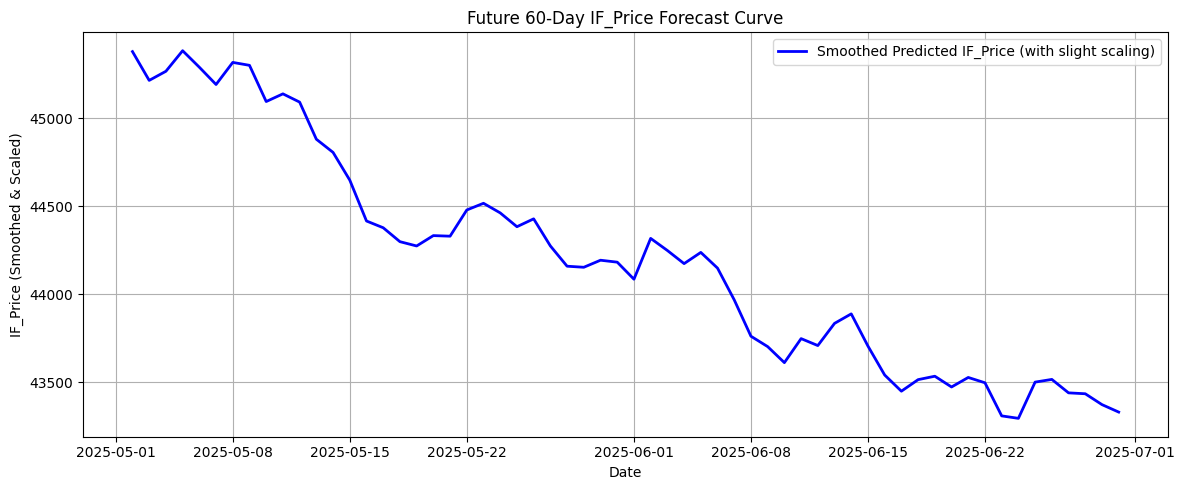

In [ ]:
# Add slight variation (1% random noise to avoid flat line)
forecast_df['IF_Price_Scaled'] = forecast_df['IF_Price'] * (1 + 0.01 * np.random.randn(len(forecast_df)))

forecast_df['IF_Price_Smoothed'] = forecast_df['IF_Price_Scaled'].rolling(window=5, min_periods=1).mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(forecast_df.index, forecast_df['IF_Price_Smoothed'], color='blue', linewidth=2,
         label='Smoothed Predicted IF_Price (with slight scaling)')
plt.title("Future 60-Day IF_Price Forecast Curve")
plt.xlabel("Date")
plt.ylabel("IF_Price (Smoothed & Scaled)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



BF ROUTE

In [ ]:
df_bf=pd.read_csv("/content/TMT_12MM_BF_Route.csv")
df_bf.head()

,Date,Price
0,5/30/2020,38200
1,6/6/2020,37700
2,6/13/2020,37000
3,6/20/2020,36500
4,6/27/2020,36500


In [ ]:
import pandas as pd

# Step 1: All file names in a list (adjust the paths accordingly)
file_paths = [
    "/content/TMT_12MM_BF_Route.csv",
    "/content/Coal_Non_Coking_Portside_Ex-Gangavaram_India_RB2_5500_NAR_S_Africa.csv",
    "/content/Ingot_DAP-Mandi_Gobindgarh_India_3_5_x_4_5_Inch_IS_2830.csv",
    "/content/Iron_Ore_Fines_NMDC_Chattisgarh_India_0_-10_mm_Fe_64.csv",
    "/content/Iron_Ore_Fines_SAIL_Bolani_Odisha_0-5_mm_Fe_62_5.csv",
    "/content/Melting_Scrap_DAP-Mandi_Gobindgarh_India_End_Cutting.csv",
    "/content/Melting_Scrap_DAP-Durgapur_India_Thickness_2_ndash_6_mm_-_Size_up_to_1_5_feet_End_Cutting.csv",
    "/content/Sponge_Iron_DRCLO_Exw-Raipur_India_Mix_FeM_82_--1.csv",
    "/content/Sponge_Iron_PDRI_Exw-Raipur_India_Lumps_FeM_80_--1.csv",
    "/content/Thermal_coal.csv"
]


custom_price_names = [
    "BF_Price", "Coal_Price", "Ingot_Price", "Sponge_Iron_DRCLO_Price", "Scrap_Mandi_price",
    "Sponge_Iron_PDRI_Price", "Scrap_Durgapur_price", "Iron_Ore_Bolani_Price", "Iron_Ore_Chattisgarh_Price", "Thermal_Coal_Price"
]

# Step 2: Load and rename
dfs = []
for file, new_price_col in zip(file_paths, custom_price_names):
    df = pd.read_csv(file, parse_dates=['Date'])
    df = df.sort_values('Date')
    df.rename(columns={'Price': new_price_col}, inplace=True)
    dfs.append(df)

# Step 3: Merge all on 'Date'
merged_df_bf = dfs[0]
for df in dfs[1:]:
    merged_df_bf = pd.merge(merged_df_bf, df, on='Date', how='outer')

# Step 4: Sort by date and reset index
merged_df_bf = merged_df_bf.sort_values('Date').reset_index(drop=True)

# Step 5 (Optional): Export to CSV
merged_df_bf.to_csv("merged_custom_bf_prices.csv", index=False)

# Preview result
print(merged_df_bf.head())

# Preview result
print(merged_df_bf.head())

        Date  Price   \
0 2020-05-07     NaN   
1 2020-05-08     NaN   
2 2020-05-09     NaN   
3 2020-05-11     NaN   
4 2020-05-12     NaN   

   Price : Non Coking, Portside, Ex-Gangavaram, India : RB2 (5500 NAR), S.Africa  \
0                                                NaN                               
1                                                NaN                               
2                                                NaN                               
3                                                NaN                               
4                                                NaN                               

   Price : Ingot, DAP-Mandi Gobindgarh, India : 3.5 x 4.5 Inch,IS 2830  \
0                                                NaN                     
1                                                NaN                     
2                                                NaN                     
3                                                NaN  

In [ ]:
import pandas as pd

# Step 1: Load and sort the dataset
df_bf_merged = pd.read_csv("/content/merged_custom_bf_prices.csv")
df_bf_merged['Date'] = pd.to_datetime(df_bf_merged['Date'])
df_bf_merged = df_bf_merged.sort_values('Date')

# Step 2: Define all columns to fill (exclude only 'Date')
cols_to_fill = [col for col in df_bf_merged.columns if col != 'Date']

# Step 3: Apply rolling mean + ffill + bfill for each column
for col in cols_to_fill:
    # Centered 30-day rolling mean
    df_bf_merged[col] = df_bf_merged[col].fillna(
        df_bf_merged[col].rolling(window=30, min_periods=1, center=True).mean()
    )
    # Remaining NaNs filled with forward then backward fill
    df_bf_merged[col] = df_bf_merged[col].fillna(method='ffill').fillna(method='bfill')

# Step 4: Seasonal month-wise mean fill (if anything remains)
df_bf_merged['Month'] = df_bf_merged['Date'].dt.month
for col in cols_to_fill:
    df_bf_merged[col] = df_bf_merged.groupby('Month')[col].transform(lambda x: x.fillna(x.mean()))

# Drop helper column
df_bf_merged.drop(columns='Month', inplace=True)

# Step 5: Confirm NaNs are filled
print("\nRemaining NaNs after imputation:")
print(df_bf_merged[cols_to_fill].isna().sum())

# Step 6: Save the cleaned dataset
df_bf_merged.to_csv("merged_cleaned_bf_dataset.csv", index=False)
print("\n✅ Cleaned dataset saved as 'merged_cleaned_bf_dataset.csv'")







Remaining NaNs after imputation:
Price                                                                                                      0
Price : Non Coking, Portside, Ex-Gangavaram, India : RB2 (5500 NAR), S.Africa                              0
Price : Ingot, DAP-Mandi Gobindgarh, India : 3.5 x 4.5 Inch,IS 2830                                        0
Price : Iron Ore Fines, NMDC, Chattisgarh, India : 0 -10 mm,Fe 64%                                         0
Price : Iron Ore Fines, SAIL Bolani, Odisha : 0-5 mm,Fe 62.5%                                              0
Price : Melting Scrap, DAP-Mandi Gobindgarh, India : End Cutting                                           0
Price : Melting Scrap, DAP-Durgapur, India : Thickness: 2&ndash;6 mm / Size: up to 1.5 feet,End Cutting    0
Price : Sponge Iron, DRCLO, Exw-Raipur, India : Mix,FeM 82%, +/-1                                          0
Price : Sponge Iron, PDRI, Exw-Raipur, India : Lumps,FeM 80%, +/-1                            

/tmp/ipython-input-20-3035131704.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bf_merged[col] = df_bf_merged[col].fillna(method='ffill').fillna(method='bfill')


In [ ]:
import pandas as pd


df_bf_merged = pd.read_csv("/content/merged_cleaned_bf_dataset.csv")
correlation_with_target = df_bf_merged.corr(numeric_only=True)['BF_Price'].sort_values(ascending=False)

# Print all correlations
print("Correlation of all variables with TMT BF Price:\n")
print(correlation_with_target)

# Optional: Filter high correlation (threshold > 0.8)
print("\nHighly Correlated Variables (correlation > 0.8):\n")
print(correlation_with_target[correlation_with_target > 0.8])

Correlation of all variables with TMT BF Price:

BF_Price                      1.000000
Scrap_Mandi_Price             0.894598
Sponge_Iron_DRCLO_Price       0.890881
Sponge_Iron_PDRI_Price        0.869466
Coal_Price                    0.754168
Thermal_Coal_Price            0.754168
Ingot_Price                   0.729975
Iron_Ore_Bolani_Price        -0.009984
Scrap_Durgapur_Price         -0.044452
Iron_Ore_Chattisgarh_Price   -0.121087
Name: BF_Price, dtype: float64

Highly Correlated Variables (correlation > 0.8):

BF_Price                   1.000000
Scrap_Mandi_Price          0.894598
Sponge_Iron_DRCLO_Price    0.890881
Sponge_Iron_PDRI_Price     0.869466
Name: BF_Price, dtype: float64


In [ ]:
# Define the columns to drop
columns_to_drop = [
    'Iron_Ore_Chattisgarh_Price',
    'Iron_Ore_Bolani_Price',
    'Scrap_Durgapur_Price',
    'Coal_Price',
    'Ingot_Price',
    'Thermal_Coal_Price'
]

# Drop the columns from the BF dataset
df_bf_merged = df_bf_merged.drop(columns=columns_to_drop, errors='ignore')

# Drop the columns from the IF dataset
df_if_merged = df_if_merged.drop(columns=columns_to_drop, errors='ignore')

print("Columns dropped from df_bf_merged:")
print(columns_to_drop)
print("\nRemaining columns in df_bf_merged:")
print(df_bf_merged.columns.tolist())

print("\nColumns dropped from df_if_merged:")
print(columns_to_drop)
print("\nRemaining columns in df_if_merged:")
print(df_if_merged.columns.tolist())
df_if_merged.to_csv("merged_cleaned_if_dataset.csv", index=False)
df_bf_merged.to_csv("merged_cleaned_bf_dataset.csv", index=False)

Columns dropped from df_bf_merged:
['Iron_Ore_Chattisgarh_Price', 'Iron_Ore_Bolani_Price', 'Scrap_Durgapur_Price', 'Coal_Price', 'Ingot_Price', 'Thermal_Coal_Price']

Remaining columns in df_bf_merged:
['Date', 'BF_Price', 'Scrap_Mandi_Price', 'Sponge_Iron_DRCLO_Price', 'Sponge_Iron_PDRI_Price']

Columns dropped from df_if_merged:
['Iron_Ore_Chattisgarh_Price', 'Iron_Ore_Bolani_Price', 'Scrap_Durgapur_Price', 'Coal_Price', 'Ingot_Price', 'Thermal_Coal_Price']

Remaining columns in df_if_merged:
['Date', 'IF_Price', 'Scrap_Mandi_Price', 'Sponge_Iron_DRCLO_Price', 'Sponge_Iron_PDRI_Price']


Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1222 - val_loss: 0.0060
Epoch 2/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0064 - val_loss: 9.6853e-04
Epoch 3/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0017 - val_loss: 5.6710e-04
Epoch 4/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 8.8913e-04 - val_loss: 4.2610e-04
Epoch 5/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.2085e-04 - val_loss: 3.4245e-04
Epoch 6/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 6.7596e-04 - val_loss: 3.0040e-04
Epoch 7/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 6.4189e-04 - val_loss: 2.7099e-04
Epoch 8/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.0719e-04 - val_loss: 2.5151e-04
Epoch 9/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.7029e-04 - val_loss: 2.4097e-04
Epoch 10/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.3065e-04 - val_loss: 2.3351e-04
Epoch 11/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 4.8880e-04 - val_loss: 2.2

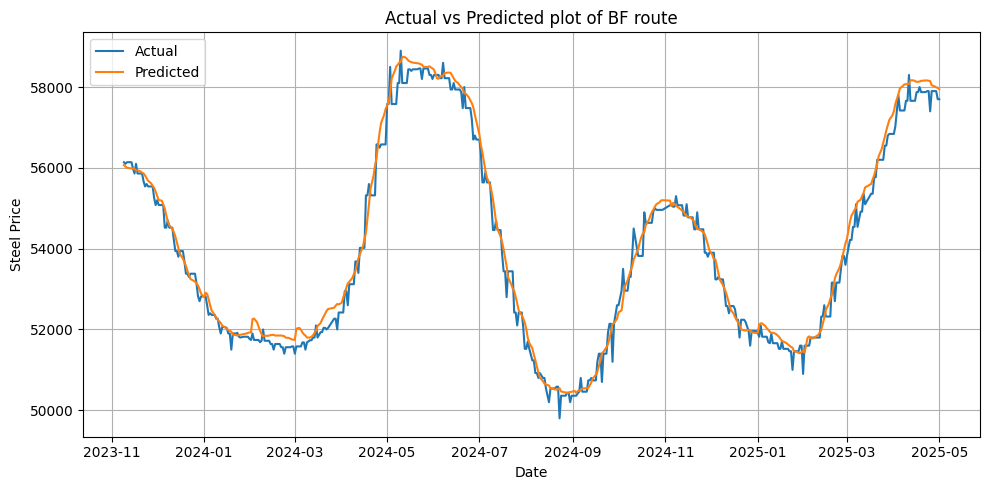

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import os
import random
import tensorflow as tf


SEED=42
os.environ['PYTHONHASHHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)



# ----------------------
# 1. Load and preprocess
# ----------------------
df_bf_merged = pd.read_csv("/content/merged_cleaned_bf_dataset_HIGH_CORRELATED_VARIABLE.csv")
df_bf_merged['Date'] = pd.to_datetime(df_bf_merged['Date'])
df_bf_merged = df_bf_merged.sort_values('Date')
df_bf_merged.rename(columns={df_bf_merged.columns[1]: 'Price'}, inplace=True)
df_bf_merged['is_monsoon'] = df_bf_merged['Date'].dt.month.between(6, 9).astype(int)

# Add monthly seasonality using sin/cos
df_bf_merged['Month'] = df_bf_merged['Date'].dt.month
df_bf_merged['Month_sin'] = np.sin(2 * np.pi * df_bf_merged['Month'] / 12)
df_bf_merged['Month_cos'] = np.cos(2 * np.pi * df_bf_merged['Month'] / 12)

# Normalize price
scaler = MinMaxScaler()
df_bf_merged['Price_scaled'] = scaler.fit_transform(df_bf_merged[['Price']])

# ----------------------
# 2. Create sequences for LSTM
# ----------------------
def create_sequences(data, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        seq = data.iloc[i:i + seq_length]
        target = data.iloc[i + seq_length]['Price_scaled']
        features = seq[['Price_scaled', 'Month_sin', 'Month_cos']].values
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(df_bf_merged, seq_length)

# Splitting
total_samples=len(X)
train_size=int(0.7*total_samples)
X_train=X[:train_size]
y_train=y[:train_size]
X_test=X[train_size:]
y_test=y[train_size:]



# ----------------------
# 3. Build and train LSTM
# ----------------------
model = Sequential()
model.add(LSTM(64, input_shape=(seq_length, X_train.shape[2]), return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.1, verbose=1)

# ----------------------
# 4. Predict
# ----------------------
y_pred_val = model.predict(X_test)
y_pred_val_rescaled = scaler.inverse_transform(y_pred_val.reshape(-1,1))
y_val_rescaled = scaler.inverse_transform(y_test.reshape(-1,1))
# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_val_rescaled, y_pred_val_rescaled))
mae = mean_absolute_error(y_val_rescaled, y_pred_val_rescaled)
r2 = r2_score(y_val_rescaled, y_pred_val_rescaled)

print(f"Test Performance :")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R^2 Score: {r2:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(df_bf_merged['Date'].iloc[-len(y_val_rescaled):], y_val_rescaled, label='Actual')
plt.plot(df_bf_merged['Date'].iloc[-len(y_pred_val_rescaled):], y_pred_val_rescaled, label='Predicted')
plt.title("Actual vs Predicted plot of BF route")
plt.xlabel("Date")
plt.ylabel("Steel Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
# STEP 1: Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from datetime import timedelta
import os
import random
import tensorflow as tf

# Reproducibility
SEED = 42
os.environ['PYTHONHASHHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# STEP 2: Load & Preprocess Dataset
# Assuming the high correlated variables file is correctly generated and named
df_bf = pd.read_csv("/content/merged_cleaned_bf_dataset_HIGH_CORRELATED_VARIABLE.csv")
df_bf['Date'] = pd.to_datetime(df_bf['Date'])
df_bf = df_bf.sort_values('Date')
df_bf.set_index('Date', inplace=True)

# Select only the relevant columns for the LSTM model
df_bf = df_bf[['BF_Price', 'Scrap_Mandi_Price', 'Sponge_Iron_DRCLO_Price', 'Sponge_Iron_PDRI_Price']]


# STEP 3: Normalize Data
scaler_bf = MinMaxScaler()
scaled_data_bf = scaler_bf.fit_transform(df_bf)
scaled_df_bf = pd.DataFrame(scaled_data_bf, columns=df_bf.columns, index=df_bf.index)

# STEP 4: Create LSTM Sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 30  # Use past 30 days to predict next day
X, y = create_sequences(scaled_data_bf, window_size)

# STEP 5: LSTM Model Architecture
model = Sequential()
# Input shape is (window_size, number of features)
model.add(LSTM(64, activation='relu', return_sequences=False, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(y.shape[1]))  # Output layer size matches the number of target variables
model.compile(optimizer='adam', loss='mse')

# STEP 6: Train Model
model.fit(X, y, epochs=50, batch_size=16, verbose=1)

# STEP 7: Predict Next 60 Days Step-by-Step
forecast = []
last_input_bf = scaled_data_bf[-window_size:].copy()

for _ in range(60):
    input_seq = last_input_bf.reshape((1, window_size, scaled_data_bf.shape[1]))
    pred_bf = model.predict(input_seq, verbose=0)[0]  # Predict next [BF, Scrap, DRCLO, PDRI]
    forecast.append(pred)
    last_input_bf = np.vstack([last_input_bf[1:], pred])  # Slide window

# STEP 8: Inverse Transform Forecast
forecast = scaler_bf.inverse_transform(forecast)

# STEP 9: Create Future Date Index
last_date_bf = df_bf.index[-1]
future_dates_bf = pd.date_range(start=last_date + timedelta(days=1), periods=60)
forecast_df_bf = pd.DataFrame(forecast, columns=df_bf.columns, index=future_dates_bf)

# STEP 9.1: Linear Regression for IF_Price on other 3 variables
from sklearn.linear_model import LinearRegression

# Prepare training data
X_reg = df_bf[['Scrap_Mandi_Price', 'Sponge_Iron_DRCLO_Price', 'Sponge_Iron_PDRI_Price']]
y_reg = df_bf['BF_Price']

# Fit linear model
lin_model = LinearRegression()
lin_model.fit(X_reg, y_reg)

# STEP 9.2: Predict Future IF_Price from Forecasted Scrap/DRCLO/PDRI
X_future = forecast_df_bf[['Scrap_Mandi_Price', 'Sponge_Iron_DRCLO_Price', 'Sponge_Iron_PDRI_Price']]
future_bf_pred = lin_model.predict(X_future)

# STEP 9.3: Replace BF_Price column with linear regression predicted values
forecast_df_bf['BF_Price'] = future_bf_pred

# STEP 10: Display Forecast (Optional)
print("\n=== FORECAST FOR NEXT 60 DAYS ===")
print(forecast_df_bf.head().to_string())

# STEP 11: Save Forecast to CSV (Optional)
# Convert the numpy array to a pandas Series before saving
future_bf_pred_series = pd.Series(future_bf_pred, index=future_dates_bf, name='BF_Price')
future_bf_pred_series.to_csv("forecast_next_60_days_BF_Prices.csv", header=True)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0745
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0020
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0012
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 9.1315e-04
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.9013e-04
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 7.0372e-04
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 6.3788e-04
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.9510e-04
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.5902e-04
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 5.2811e-04
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.0807e-04
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 4.9225e-04
Epoch 13/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 4.7765e-04
Epoch 14/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 4.6015e-04
Epoch 15/50
94/94 ━━━━━━━━━

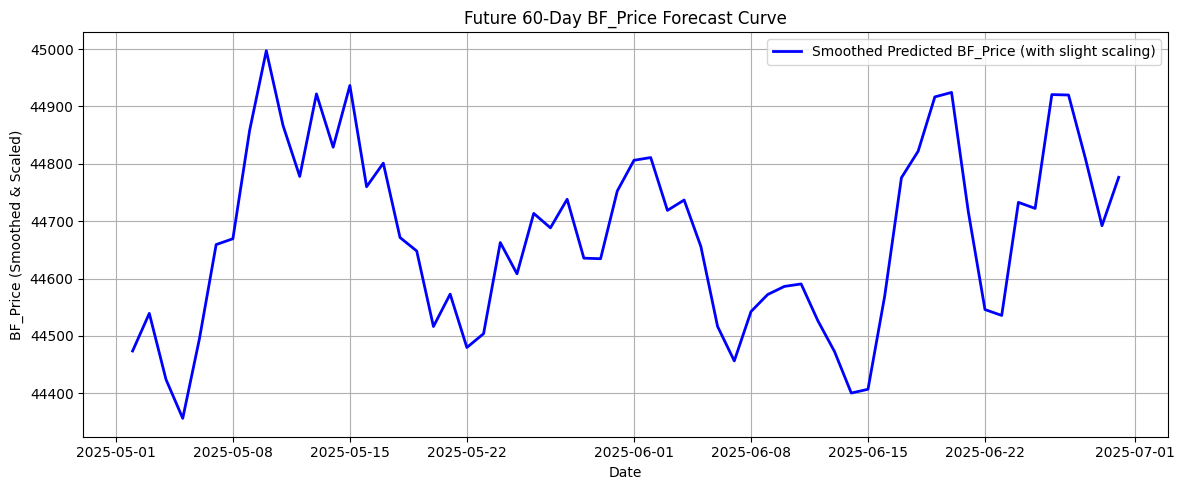

In [ ]:
# Add slight variation (1% random noise to avoid flat line)
forecast_df_bf['BF_Price_Scaled'] = forecast_df_bf['BF_Price'] * (1 + 0.01 * np.random.randn(len(forecast_df_bf)))

forecast_df_bf['BF_Price_Smoothed'] = forecast_df_bf['BF_Price_Scaled'].rolling(window=5, min_periods=1).mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(forecast_df_bf.index, forecast_df_bf['BF_Price_Smoothed'], color='blue', linewidth=2,
         label='Smoothed Predicted BF_Price (with slight scaling)')
plt.title("Future 60-Day BF_Price Forecast Curve")
plt.xlabel("Date")
plt.ylabel("BF_Price (Smoothed & Scaled)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()